In [1]:
%reset -f
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import scipy.io as sio
import sebaba.ml as sbbml
import sebaba.utils as utils
import matplotlib.pyplot as plt
import matplotlib.ticker as tkr

In [3]:
pd.options.display.float_format = "{:.4f}".format

In [4]:
data = pd.read_csv("data/ex3data.tsv", sep = "\t"); data.head()

,exam_1_score,exam_2_score,pass
0,34.6237,78.0247,0
1,30.2867,43.8950,0
2,35.8474,72.9022,0
3,60.1826,86.3086,1
4,79.0327,75.3444,1


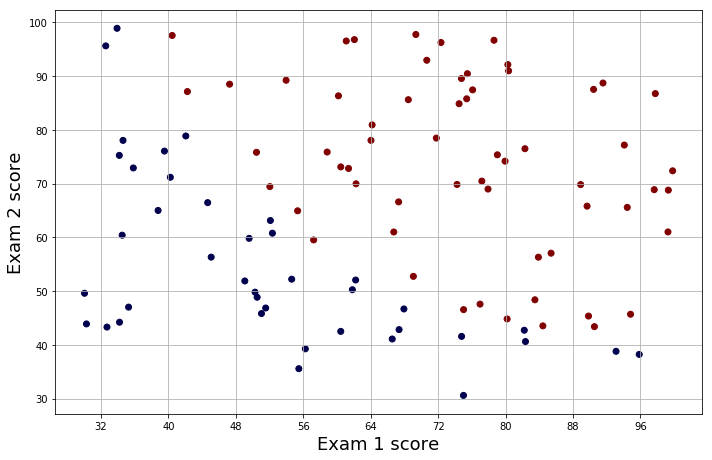

In [5]:
fig, ax = plt.subplots(figsize = (10.0, 6.5))
ax.scatter(data = data, x = "exam_1_score", y = "exam_2_score", c = "pass", cmap = "seismic")
ax.set_xlabel("Exam 1 score", fontsize = 18)
ax.set_ylabel("Exam 2 score", fontsize = 18)
ax.xaxis.set_major_locator(tkr.MaxNLocator(integer = True))
ax.margins(0.05)
ax.axis("tight")
ax.grid(True)
fig.tight_layout()

plt.show()

In [6]:
x = data[["exam_1_score", "exam_2_score"]].values
y = data[["pass"]].values

In [7]:
x_train, x_test, y_train, y_test = utils.split_train_test(x, y, prop_train = 80, seed = 123)

In [8]:
model = sbbml.Perceptron(alpha = 0.01, iterations = 10000)
model.fit(x_train, y_train)

In [9]:
y_pred = model.predict(x_test)
np.mean(y_pred.flatten() == y_test.flatten())

0.9